# Расчетно-графическая работа №3

**Вариант 2**

Для каждой проблемы нужно провести два статистических теста, если не сказано иное, причем первый из критериев нужно реализовать самостоятельно (считать и выводить значение статистики, критическое значение, p-value), в качестве второго можно воспользоваться готовой реализацией. Также нужно отдельно указывать, как формализуются $H_0$ и $H_1$ для выбранных тестов. Уровень значимости выбираете сами.

В файле [https://drive.google.com/file/d/1EOoNW8IIZHoKQ6lwuv2TZHiOpNfBHVIZ/view](https://drive.google.com/file/d/1EOoNW8IIZHoKQ6lwuv2TZHiOpNfBHVIZ/view) приведены данные о шахматных играх с одной онлайн-площадки (любители шахмат поймут, о какой именно речь).

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

filename = "chess_games.csv"

df = pd.read_csv(filename)

print(f"Размеры выборки: {len(df)}")

df[:5]

Размеры выборки: 20058


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Задание 1

Предположите, с каким вероятностным законом распределено количество ходов. С помощью статистического теста подтвердите/опровергните это предположение (первый тест – критерий согласия Колмогорова, если распределение абсолютно непрерывное, либо критерий согласия Пирсона хи-квадрат, если распределение дискретное).

## Задание 2

Верно ли, что распределение ходов рейтинговых и не рейтинговых игр одинаково (первый тест – критерий однородности Смирнова или хи-квадрат, или f-тест + t-тест)?

In [21]:
rated_turns = df[df['rated'] == True]['turns'].dropna()
unrated_turns = df[df['rated'] == False]['turns'].dropna()

print(f"Количество рейтинговых игр: {len(rated_turns)}")
print(f"Количество нерейтинговых игр: {len(unrated_turns)}")

alpha = 0.05
print(f"Уровень значимости alpha = {alpha}\n")

print("1. Самостоятельная реализация критерия Колмогорова-Смирнова:")

# Гипотезы
H0_ks_2samp = "H0: Распределения количества ходов в рейтинговых и нерейтинговых играх одинаковы."
H1_ks_2samp = "H1: Распределения количества ходов в рейтинговых и нерейтинговых играх различны."
print(H0_ks_2samp)
print(H1_ks_2samp)

def ecdf_values(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

def ks_2samp_manual(data1, data2, alpha_level):
    n1 = len(data1)
    n2 = len(data2)

    if n1 == 0 or n2 == 0:
        return np.nan, np.nan, np.nan

    sorted_data1 = np.sort(data1)
    sorted_data2 = np.sort(data2)
    all_points = np.unique(np.concatenate((sorted_data1, sorted_data2)))
    max_diff = 0
    for x_val in all_points:
        ecdf1_val = np.sum(sorted_data1 <= x_val) / n1
        ecdf2_val = np.sum(sorted_data2 <= x_val) / n2
        max_diff = max(max_diff, abs(ecdf1_val - ecdf2_val))

    D_statistic = max_diff
    K_crit = stats.kstwobign.ppf(1 - alpha_level)
    D_crit = K_crit / np.sqrt((n1 * n2) / (n1 + n2))
    K_observed = D_statistic * np.sqrt((n1 * n2) / (n1 + n2))
    p_value = stats.kstwobign.sf(K_observed)

    return D_statistic, D_crit, p_value

D_manual, D_crit_manual, p_value_manual = ks_2samp_manual(rated_turns, unrated_turns, alpha)

print(f"  Статистика D (ручной расчет): {D_manual:.4f}")
print(f"  Критическое значение D_crit (для alpha={alpha}): {D_crit_manual:.4f}")
print(f"  P-value (ручной расчет): {p_value_manual:.4g}")

if p_value_manual < alpha:
    print(f"  Вывод (ручной): P-value ({p_value_manual:.4g}) < alpha ({alpha}). Отвергаем H0.")
    print("  Распределения количества ходов в рейтинговых и нерейтинговых играх статистически значимо различаются.")
else:
    print(f"  Вывод (ручной): P-value ({p_value_manual:.4g}) >= alpha ({alpha}). Не отвергаем H0.")
    print("  Нет достаточных оснований считать, что распределения количества ходов в рейтинговых и нерейтинговых играх различаются.")

print("\n2. Использование scipy.stats.chi2_contingency (критерий хи-квадрат для однородности):")

H0_chi2 = "H0 (Хи-квадрат): Распределения количества ходов (по категориям) одинаковы для рейтинговых и нерейтинговых игр."
H1_chi2 = "H1 (Хи-квадрат): Распределения количества ходов (по категориям) различны для рейтинговых и нерейтинговых игр."
print(H0_chi2)
print(H1_chi2)

min_turns = min(rated_turns.min(), unrated_turns.min())
max_turns = max(rated_turns.max(), unrated_turns.max())

all_turns = np.concatenate((rated_turns, unrated_turns))
bins = np.linspace(min_turns, min(max_turns, 200), 11)
bins = np.append(bins, np.inf)

hist_rated, _ = np.histogram(rated_turns, bins=bins)
hist_unrated, _ = np.histogram(unrated_turns, bins=bins)

contingency_table = np.array([hist_rated, hist_unrated])

print("\nТаблица сопряженности (наблюдаемые частоты):")
print(f"Бины для ходов: {bins}")
print(contingency_table)

valid_cols = contingency_table.sum(axis=0) > 0
contingency_table_filtered = contingency_table[:, valid_cols]
if contingency_table_filtered.shape[1] < contingency_table.shape[1]:
    print("Некоторые бины были пустыми для обеих выборок и были удалены для теста хи-квадрат.")
    print("Отфильтрованная таблица сопряженности:")
    print(contingency_table_filtered)
    if contingency_table_filtered.shape[1] < 2:
        print("Недостаточно категорий для теста хи-квадрат после фильтрации. Пропуск теста.")
        chi2_stat, p_value_chi2, dof, expected_freqs = np.nan, np.nan, np.nan, np.nan
    else:
        chi2_stat, p_value_chi2, dof, expected_freqs = stats.chi2_contingency(contingency_table_filtered)
else:
    if contingency_table.shape[1] < 2:
        print("Недостаточно категорий для теста хи-квадрат. Пропуск теста.")
        chi2_stat, p_value_chi2, dof, expected_freqs = np.nan, np.nan, np.nan, np.nan
    else:
        chi2_stat, p_value_chi2, dof, expected_freqs = stats.chi2_contingency(contingency_table)


if not np.isnan(chi2_stat):
    print(f"\n  Статистика хи-квадрат (scipy): {chi2_stat:.4f}")
    print(f"  P-value (scipy): {p_value_chi2:.4g}")
    print(f"  Степени свободы: {dof}")
    if p_value_chi2 < alpha:
        print(f"\n  Вывод (scipy, Хи-квадрат): P-value ({p_value_chi2:.4g}) < alpha ({alpha}). Отвергаем H0 (Хи-квадрат).")
        print("  Распределения количества ходов (по категориям) для рейтинговых и нерейтинговых игр статистически значимо различаются.")
    else:
        print(f"\n  Вывод (scipy, Хи-квадрат): P-value ({p_value_chi2:.4g}) >= alpha ({alpha}). Не отвергаем H0 (Хи-квадрат).")
        print("  Нет достаточных оснований (Хи-квадрат) считать, что распределения ходов (по категориям) различаются.")
else:
    print("\n  Тест хи-квадрат не был выполнен из-за недостаточного количества категорий.")

fig_ecdf = go.Figure()
x_rated, y_rated = ecdf_values(rated_turns)
fig_ecdf.add_trace(go.Scatter(x=x_rated, y=y_rated, mode='markers', name='Рейтинговые игры (ECDF)', marker=dict(size=4)))
x_unrated, y_unrated = ecdf_values(unrated_turns)
fig_ecdf.add_trace(go.Scatter(x=x_unrated, y=y_unrated, mode='markers', name='Нерейтинговые игры (ECDF)', marker=dict(size=4)))
fig_ecdf.update_layout(
    title_text='Эмпирические функции распределения ходов',
    xaxis_title='Количество ходов',
    yaxis_title='ECDF',
    legend_title_text='Тип игры',
    height=500,
    width=800
)
fig_ecdf.show()

df_rated_turns = pd.DataFrame({'turns': rated_turns, 'type': 'Рейтинговые'})
df_unrated_turns = pd.DataFrame({'turns': unrated_turns, 'type': 'Нерейтинговые'})
df_for_hist = pd.concat([df_rated_turns, df_unrated_turns])
fig_hist = px.histogram(
    df_for_hist,
    x="turns",
    color="type",
    marginal="rug",
    barmode='overlay',
    histnorm='probability density',
    opacity=0.7,
    nbins=50
)
fig_hist.update_layout(
    title_text='Распределение количества ходов',
    xaxis_title_text='Количество ходов',
    yaxis_title_text='Плотность вероятности',
    legend_title_text='Тип игры',
    height=500,
    width=800
)
fig_hist.show()

Количество рейтинговых игр: 16155
Количество нерейтинговых игр: 3903
Уровень значимости alpha = 0.05

1. Самостоятельная реализация критерия Колмогорова-Смирнова:
H0: Распределения количества ходов в рейтинговых и нерейтинговых играх одинаковы.
H1: Распределения количества ходов в рейтинговых и нерейтинговых играх различны.
  Статистика D (ручной расчет): 0.1044
  Критическое значение D_crit (для alpha=0.05): 0.0242
  P-value (ручной расчет): 3.491e-30
  Вывод (ручной): P-value (3.491e-30) < alpha (0.05). Отвергаем H0.
  Распределения количества ходов в рейтинговых и нерейтинговых играх статистически значимо различаются.

2. Использование scipy.stats.chi2_contingency (критерий хи-квадрат для однородности):
H0 (Хи-квадрат): Распределения количества ходов (по категориям) одинаковы для рейтинговых и нерейтинговых игр.
H1 (Хи-квадрат): Распределения количества ходов (по категориям) различны для рейтинговых и нерейтинговых игр.

Таблица сопряженности (наблюдаемые частоты):
Бины для ходов: [

## Задание 3

Верно ли, что количество ходов уменьшается при увеличении разницы рейтинга (первый тест – критерий на один из коэффициентов корреляции)?


=== РУЧНОЙ РАСЧЁТ ===
Коэффициент корреляции Пирсона (r): -0.12653
t-статистика: -18.06439
Критическое значение t при α=0.05: 1.96008
p-value (ручной расчёт): 2.278e-72

=== ГОТОВАЯ ФУНКЦИЯ ===
Коэффициент Пирсона (scipy): -0.12653
p-value (scipy): 2.278e-72

=== ВЫВОД ===
H₀: между rating_diff и moves нет линейной связи (ρ = 0)
H₁: между ними есть линейная связь (ρ ≠ 0)
Отвергаем H₀: связь существует (по t-статистике)
Отвергаем H₀: связь статистически значима (по p-value)


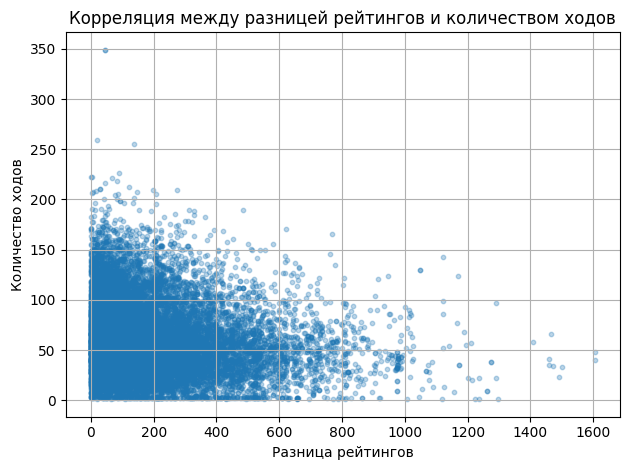

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import t, pearsonr
import matplotlib.pyplot as plt

df['white_rating'] = pd.to_numeric(df['white_rating'], errors='coerce')
df['black_rating'] = pd.to_numeric(df['black_rating'], errors='coerce')
df['moves'] = pd.to_numeric(df['turns'], errors='coerce')

df = df.dropna(subset=['white_rating', 'black_rating', 'moves'])

df['rating_diff'] = abs(df['white_rating'] - df['black_rating'])

x = df['rating_diff'].values
y = df['moves'].values
n = len(x)
alpha = 0.05

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
r_manual = numerator / denominator

t_stat = r_manual * np.sqrt(n - 2) / np.sqrt(1 - r_manual**2)

t_critical = t.ppf(1 - alpha / 2, df=n - 2)

p_value_manual = 2 * t.sf(np.abs(t_stat), df=n - 2)

r_scipy, p_scipy = pearsonr(x, y)

print("\n=== РУЧНОЙ РАСЧЁТ ===")
print(f"Коэффициент корреляции Пирсона (r): {r_manual:.5f}")
print(f"t-статистика: {t_stat:.5f}")
print(f"Критическое значение t при α={alpha}: {t_critical:.5f}")
print(f"p-value (ручной расчёт): {p_value_manual:.3e}")

print("\n=== ГОТОВАЯ ФУНКЦИЯ ===")
print(f"Коэффициент Пирсона (scipy): {r_scipy:.5f}")
print(f"p-value (scipy): {p_scipy:.3e}")

print("\n=== ВЫВОД ===")
print("H₀: между rating_diff и moves нет линейной связи (ρ = 0)")
print("H₁: между ними есть линейная связь (ρ ≠ 0)")

if abs(t_stat) > t_critical:
    print("Отвергаем H₀: связь существует (по t-статистике)")
else:
    print("Не отвергаем H₀: недостаточно оснований (по t-статистике)")

if p_value_manual < alpha:
    print("Отвергаем H₀: связь статистически значима (по p-value)")
else:
    print("Не отвергаем H₀: p-value слишком велико")

plt.scatter(x, y, alpha=0.3, s=10)
plt.xlabel("Разница рейтингов")
plt.ylabel("Количество ходов")
plt.title("Корреляция между разницей рейтингов и количеством ходов")
plt.grid(True)
plt.tight_layout()
plt.show()